Génération de la database d'entrainement



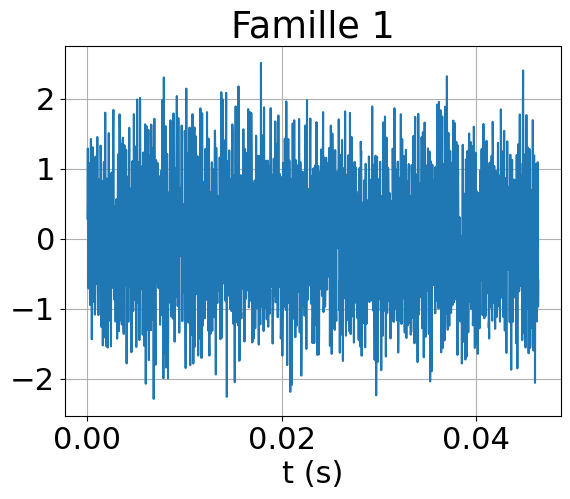

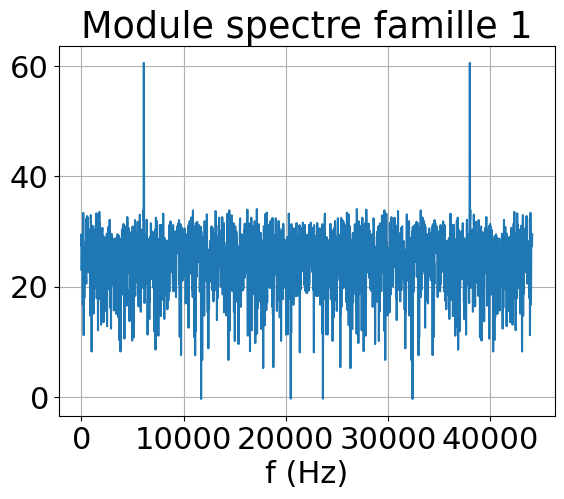

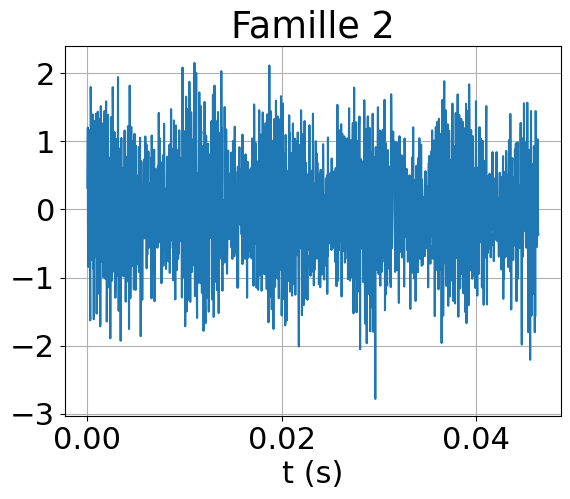

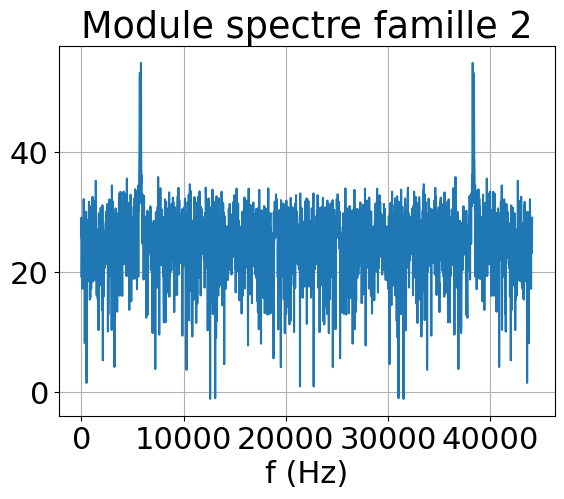

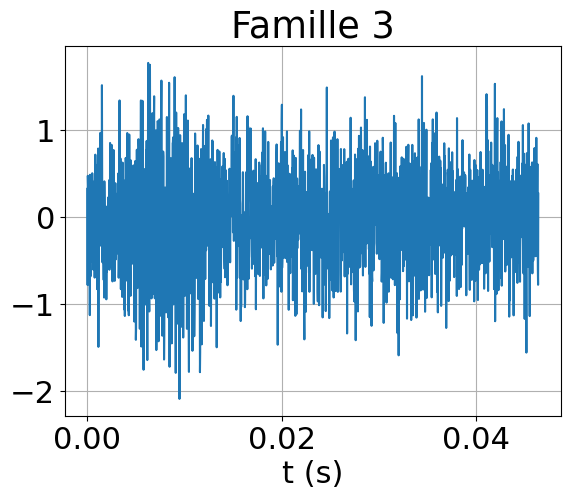

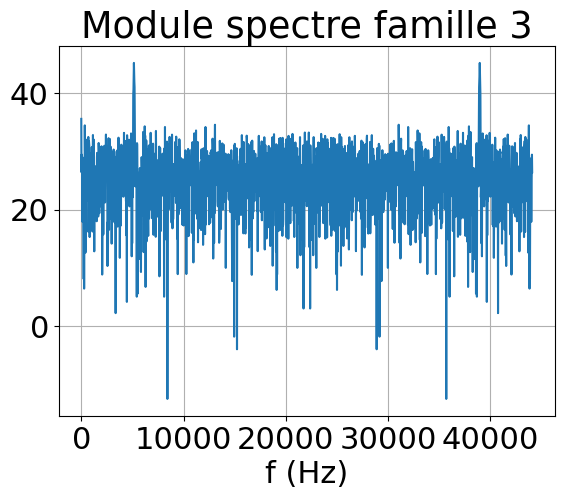

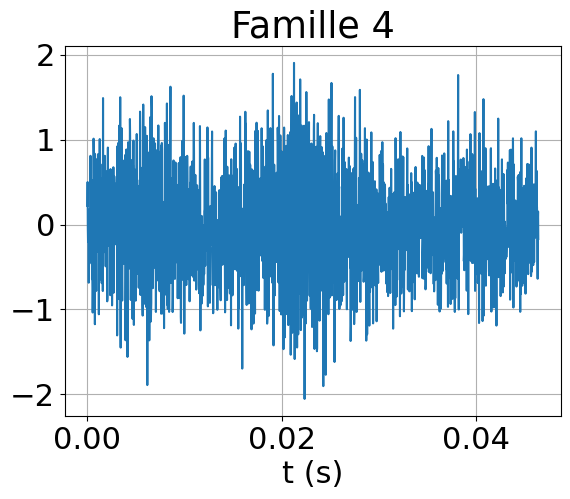

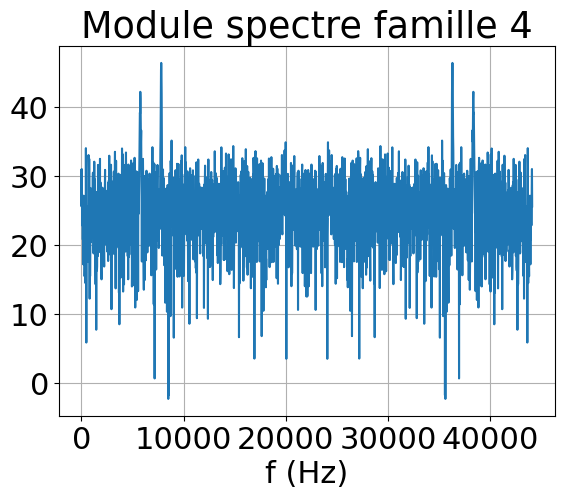

Sauvegarde du dataset d'apprentissage

Génération du dataset  de test

Enregistrement du dataset de test



In [3]:

import numpy as np
import matplotlib.pyplot as pl

pl.rcParams.update({'font.size': 22})

NbrPts=2048
Fe=44100

t=np.arange(NbrPts)/Fe
f=np.arange(NbrPts)*Fe/NbrPts

AmpB=0.5  

print("Génération de la database d'entrainement\n")
NbrFamilleApp=np.array([750, 700, 800, 750])
Visu=1


y=np.zeros((np.sum(NbrFamilleApp[0:4]), NbrPts),'float')
c=np.zeros((np.sum(NbrFamilleApp[0:4]), 1),'int')

#
### Famille n°1
#
f1=5500-1500*(np.random.rand(NbrFamilleApp[0])-0.5)
a1=1-0.2*(np.random.rand(NbrFamilleApp[0])-0.5)


for i in range(NbrFamilleApp[0]):
    y[i]=np.multiply(a1[i], np.sin(2*np.pi*f1[i]*t))+AmpB*np.random.randn(NbrPts)
    c[i]=1
    if i==Visu :
        pl.figure(3*i+1)
        pl.plot(t,y[i],'-')
        pl.xlabel("t (s)")
        pl.grid(True)
        pl.title("Famille 1")

        SpectreM_y=abs(np.fft.fft(y[i]));
        SpectreP_y=np.unwrap(np.angle(np.fft.fft(y[i])))
        pl.figure(3*i+2)
        pl.plot(f,20*np.log10(SpectreM_y),'-')
        pl.xlabel("f (Hz)")
        pl.grid(True)
        pl.title("Module spectre famille 1")
        pl.show()
#
### Famille n°2
#
f1=5500-1500*(np.random.rand(NbrFamilleApp[1])-0.5)
Delta=  200*(np.random.rand(NbrFamilleApp[1])-0.5)
f2=f1+100*np.sign(Delta)+Delta
a1=1-0.25*(np.random.rand(NbrFamilleApp[1])-0.5)



for i in range(NbrFamilleApp[1]):
    y[np.sum(NbrFamilleApp[0:1])+i]=0.5*np.multiply(a1[i], (np.sin(2*np.pi*f1[i]*t) + np.cos(2*np.pi*f2[i]*t)))+AmpB*np.random.randn(NbrPts)
    c[np.sum(NbrFamilleApp[0:1])+i]=2

    if i==Visu :
        pl.figure(3*i+1)
        pl.plot(t,y[np.sum(NbrFamilleApp[0:1])+i],'-')
        pl.xlabel("t (s)")
        pl.grid(True)
        pl.title("Famille 2")

        SpectreM_y=abs(np.fft.fft(y[np.sum(NbrFamilleApp[0:1])+i]));
        SpectreP_y=np.unwrap(np.angle(np.fft.fft(y[np.sum(NbrFamilleApp[0:1])+i])))
        pl.figure(3*i+2)
        pl.plot(f,20*np.log10(SpectreM_y),'-')
        pl.xlabel("f (Hz)")
        pl.grid(True)
        pl.title("Module spectre famille 2")
        pl.show()
#
### Famille n°3
#
f1=5500-1500*(np.random.rand(NbrFamilleApp[2])-0.5)
Delta= np.asarray(np.round(800 - 500*(np.random.rand(NbrFamilleApp[2])-0.5)), dtype="int")
a1=1-0.25*(np.random.rand(NbrFamilleApp[2])-0.5)


for i in range(NbrFamilleApp[2]):
    y[np.sum(NbrFamilleApp[0:2])+i]=np.multiply(a1[i] ,np.multiply(np.sin(2*np.pi*f1[i]*t), np.concatenate((np.hanning(Delta[i]), np.zeros(NbrPts-Delta[i])), axis=0)))+AmpB*np.random.randn(NbrPts)
    c[np.sum(NbrFamilleApp[0:2])+i]=3

    if i==Visu :
        pl.figure(3*i+1)
        pl.plot(t,y[np.sum(NbrFamilleApp[0:2])+i],'-')
        pl.xlabel("t (s)")
        pl.grid(True)
        pl.title("Famille 3")

        SpectreM_y=abs(np.fft.fft(y[np.sum(NbrFamilleApp[0:2])+i]));
        SpectreP_y=np.unwrap(np.angle(np.fft.fft(y[np.sum(NbrFamilleApp[0:2])+i])))
        pl.figure(3*i+2)
        pl.plot(f,20*np.log10(SpectreM_y),'-')
        pl.xlabel("f (Hz)")
        pl.grid(True)
        pl.title("Module spectre famille 3")

        pl.show()
#
### Famille n°4
#
f1=5500-800*(np.random.rand(NbrFamilleApp[3])-0.5)
f2=7500-1200*(np.random.rand(NbrFamilleApp[3])-0.5)
Delta1= np.asarray(np.round(600 - 200*(np.random.rand(NbrFamilleApp[3])-0.5)), dtype="int")
Delta2= np.asarray(np.round(1000 - 600*(np.random.rand(NbrFamilleApp[3])-0.5)), dtype="int")
a1=1-0.25*(np.random.rand(NbrFamilleApp[3])-0.5)


for i in range(NbrFamilleApp[3]):
    y[np.sum(NbrFamilleApp[0:3])+i]=np.multiply(a1[i], np.multiply(np.sin(2*np.pi*f1[i]*t), np.concatenate((np.hanning(Delta1[i]), np.zeros(NbrPts-Delta1[i])), axis=0)) + np.multiply(np.sin(2*np.pi*f2[i]*t), np.concatenate((np.zeros(Delta1[i]), np.hanning(Delta2[i]), np.zeros(NbrPts-Delta1[i]-Delta2[i])), axis=0)))+AmpB*np.random.randn(NbrPts)
    c[np.sum(NbrFamilleApp[0:3])+i]=4

    if i==Visu :
        pl.figure(3*i+1)
        pl.plot(t,y[np.sum(NbrFamilleApp[0:3])+i],'-')
        pl.xlabel("t (s)")
        pl.grid(True)
        pl.title("Famille 4")

        SpectreM_y=abs(np.fft.fft(y[np.sum(NbrFamilleApp[0:3])+i]));
        SpectreP_y=np.unwrap(np.angle(np.fft.fft(y[np.sum(NbrFamilleApp[0:3])+i])))
        pl.figure(3*i+2)
        pl.plot(f,20*np.log10(SpectreM_y),'-')
        pl.xlabel("f (Hz)")
        pl.grid(True)
        pl.title("Module spectre famille 4")
        pl.show()


print("Sauvegarde du dataset d'apprentissage\n")

FichierDestination = open("Donneesentrainement.txt", "w")
FichierDestination.write("#francois lachance,Ingenieur genie electrique et systeme intelligents \n")

FichierDestination = open("Donneesentrainement.txt", "a+")
for i in range(np.sum(NbrFamilleApp[0:4])):
   ligne=np.concatenate((c[i], y[i]), axis=0)
   ligne.tofile(FichierDestination, sep=',', format="%10.4f")
   FichierDestination.write("\n")

FichierDestination.close()

print("Génération du dataset  de test\n")

NbrFamilleTest=np.array([600, 600, 600, 600])   
Visu=1


y=np.zeros((np.sum(NbrFamilleTest[0:4]), NbrPts),'float')
c=np.zeros((np.sum(NbrFamilleApp[0:4]), 1),'int')

#
### Famille n°1
#
f1=5500-1500*(np.random.rand(NbrFamilleApp[0])-0.5)
a1=1-0.2*(np.random.rand(NbrFamilleApp[0])-0.5)

for i in range(NbrFamilleTest[0]):
    y[i]=np.multiply(a1[i], np.sin(2*np.pi*f1[i]*t))+AmpB*np.random.randn(NbrPts)
    c[i]=1

#
### Famille n°2
#
f1=5500-1500*(np.random.rand(NbrFamilleApp[1])-0.5)
Delta=  200*(np.random.rand(NbrFamilleApp[1])-0.5)
f2=f1+100*np.sign(Delta)+Delta
a1=1-0.25*(np.random.rand(NbrFamilleApp[1])-0.5)



for i in range(NbrFamilleTest[1]):
    y[np.sum(NbrFamilleTest[0:1])+i]=0.5*np.multiply(a1[i], (np.sin(2*np.pi*f1[i]*t) + np.cos(2*np.pi*f2[i]*t)))+AmpB*np.random.randn(NbrPts)
    c[np.sum(NbrFamilleTest[0:1])+i]=2
#
### Famille n°3
#
f1=5500-1500*(np.random.rand(NbrFamilleApp[2])-0.5)
Delta= np.asarray(np.round(800 - 500*(np.random.rand(NbrFamilleApp[2])-0.5)), dtype="int")
a1=1-0.25*(np.random.rand(NbrFamilleApp[2])-0.5)


for i in range(NbrFamilleTest[2]):
    #print(Delta[i])
    y[np.sum(NbrFamilleTest[0:2])+i]=np.multiply(a1[i] ,np.multiply(np.sin(2*np.pi*f1[i]*t), np.concatenate((np.hanning(Delta[i]), np.zeros(NbrPts-Delta[i])), axis=0)))+AmpB*np.random.randn(NbrPts)
    c[np.sum(NbrFamilleTest[0:2])+i]=3

#
### Famille n°4
#
f1=5500-800*(np.random.rand(NbrFamilleApp[3])-0.5)
f2=7500-1200*(np.random.rand(NbrFamilleApp[3])-0.5)
Delta1= np.asarray(np.round(600 - 200*(np.random.rand(NbrFamilleApp[3])-0.5)), dtype="int")
Delta2= np.asarray(np.round(1000 - 600*(np.random.rand(NbrFamilleApp[3])-0.5)), dtype="int")
a1=1-0.25*(np.random.rand(NbrFamilleApp[3])-0.5)


for i in range(NbrFamilleTest[3]):
    #print(NbrPts, Delta1[i], Delta2[i],NbrPts-Delta1[i]-Delta2[i])
    y[np.sum(NbrFamilleTest[0:3])+i]=np.multiply(a1[i], np.multiply(np.sin(2*np.pi*f1[i]*t), np.concatenate((np.hanning(Delta1[i]), np.zeros(NbrPts-Delta1[i])), axis=0)) + np.multiply(np.sin(2*np.pi*f2[i]*t), np.concatenate((np.zeros(Delta1[i]), np.hanning(Delta2[i]), np.zeros(NbrPts-Delta1[i]-Delta2[i])), axis=0)))+AmpB*np.random.randn(NbrPts)
    c[np.sum(NbrFamilleTest[0:3])+i]=4


print("Enregistrement du dataset de test\n")

FichierDestination = open("Donneestest.txt", "w")
FichierDestination.write("#  francois lachance,ingenieur genie electrique et systeme intelligents \n")

FichierDestination = open("Donneestest.txt", "a+")

for i in range(np.sum(NbrFamilleTest[0:4])):

   ligne=np.concatenate((c[i], y[i]), axis=0)
   ligne.tofile(FichierDestination, sep=',', format="%10.4f")
   FichierDestination.write("\n")

FichierDestination.close()
